In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [36]:
df = pd.read_csv('C:\\Users\Super\\Downloads\\titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


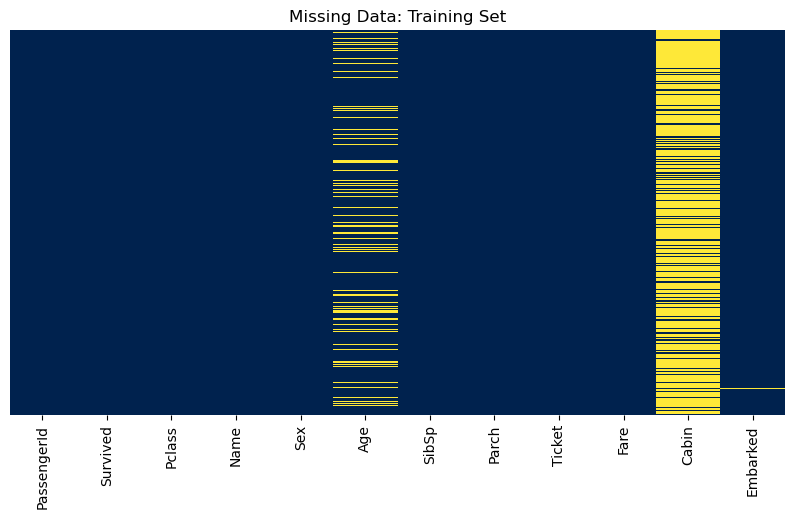

In [5]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'cividis')
plt.title('Missing Data: Training Set')
plt.show()

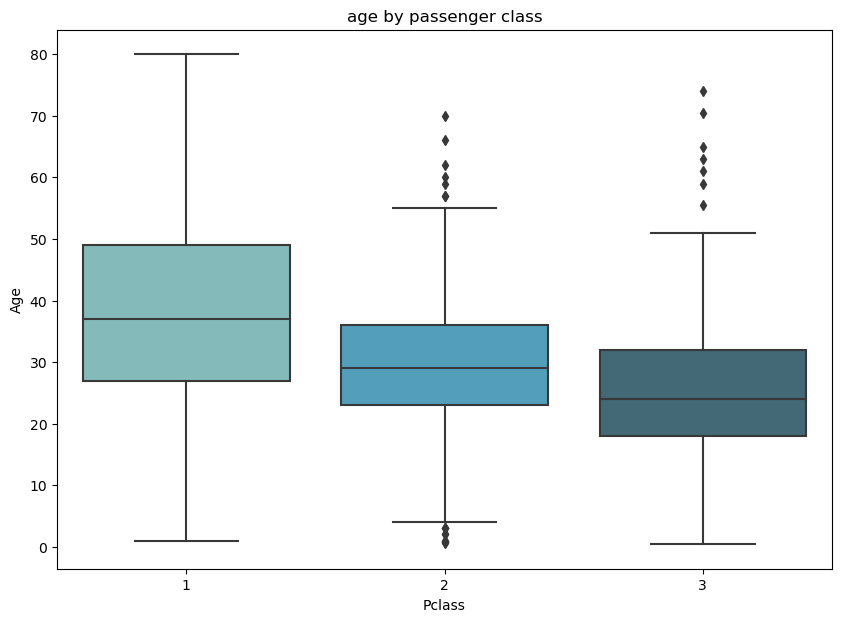

In [6]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='GnBu_d').set_title('age by passenger class')
plt.show()

In [7]:
#Imputation function
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
         return Age
      
           

# apply the function to the age column 

df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)


In [ ]:
df.drop('Cabin', axis = 1, inplace = True)

In [39]:
#remove rows with missing data
df.dropna(inplace=True)

In [10]:
#remove unnecessary columns 
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [11]:
#convert objects to category data type 
object=['Sex','Embarked']
for colname in object:
    df[colname]=df[colname].astype('category')

In [12]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [13]:
df.drop('PassengerId',inplace=True,axis=1)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#identify categorical features
df.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [17]:
# convert categorical variable into dummy or indicator variable
sex=pd.get_dummies(df['Sex'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [18]:
# add new dummy columns to dataframe
df=pd.concat([df,sex,embarked],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [19]:
df.drop(['Sex','Embarked'],inplace=True,axis=1)

In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Target Variable Splitting

In [21]:
#We will spilt the Full dataset into Input and target variables

#Input is also called Feature Variables Output referes to Target variables



In [22]:
#create matix of features
x=df.drop('Survived',axis=1) # x represent features

#create target variable
y=df['Survived'] # y is the column we are trying to predict

In [23]:
x.shape

(889, 8)

In [24]:
y.shape

(889,)

In [25]:
#use x and y variable to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=101)

In [26]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
307,1,17.0,1,0,108.9000,0,0,0
229,3,24.0,3,1,25.4667,0,0,1
82,3,24.0,0,0,7.7875,0,1,0
353,3,25.0,1,0,17.8000,1,0,1
707,1,42.0,0,0,26.2875,1,0,1
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,0,0,1
840,3,20.0,0,0,7.9250,1,0,1
338,3,45.0,0,0,8.0500,1,0,1
524,3,24.0,0,0,7.2292,1,0,0


In [27]:
y_train

307    1
229    0
82     1
353    0
707    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 711, dtype: int64

In [28]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.0500,1,0,1
613,3,24.0,0,0,7.7500,1,1,0
615,2,24.0,1,2,65.0000,0,0,1
337,1,41.0,0,0,134.5000,0,0,0
718,3,24.0,0,0,15.5000,1,1,0
...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,1,0,0
450,2,36.0,1,2,27.7500,1,0,1
756,3,28.0,0,0,7.7958,1,0,1
187,1,45.0,0,0,26.5500,1,0,1


In [29]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
155    0
450    0
756    0
187    1
180    0
Name: Survived, Length: 178, dtype: int64

# LOGISTIC REGRESSION


Model Training

In [30]:
#fit
# import model
from sklearn.linear_model import LogisticRegression
ireg=LogisticRegression()
# pass training data to model
ireg.fit(x_train,y_train)

LogisticRegression()

# Model Testing


Class prediction

In [31]:
#predict
y_predict_ireg=ireg.predict(x_test)
print(y_predict_ireg)
y_predict_ireg.shape

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]


(178,)

In [32]:
probabilities = ireg.predict_proba(x_test)[:, 1]
print(probabilities.shape)
print(probabilities)

(178,)
[0.109253   0.17773178 0.74823182 0.92026066 0.17923442 0.04189799
 0.11564511 0.23012612 0.07881639 0.67516479 0.78824821 0.94479684
 0.10923316 0.57766638 0.10943974 0.12263706 0.91633419 0.84251929
 0.54118197 0.10003649 0.10933185 0.08695044 0.42380718 0.34707463
 0.04222597 0.43918353 0.60045413 0.58878005 0.0929513  0.29927329
 0.09264006 0.25338225 0.01225878 0.10605718 0.10918171 0.1104076
 0.75615953 0.06367026 0.122465   0.13442274 0.53043283 0.13742608
 0.1191466  0.92765522 0.61210721 0.12698455 0.61567376 0.86568878
 0.10291069 0.26675351 0.48912444 0.79795881 0.16935772 0.12292071
 0.10912438 0.07196006 0.42748848 0.08624919 0.07430792 0.91084004
 0.67516479 0.9342894  0.88905049 0.08654536 0.13952978 0.04975333
 0.11568205 0.43216119 0.05801084 0.14302875 0.33799147 0.13596739
 0.61964136 0.88739382 0.11184746 0.72909713 0.08107326 0.13596739
 0.10373381 0.29707041 0.29917306 0.37634534 0.45073918 0.12263706
 0.28121186 0.65842528 0.07119817 0.87047924 0.0989935  

In [33]:
for i in range(len(y_test)):
  print(round(probabilities[i], 3)," --> ", y_predict_ireg[i])

0.109  -->  0
0.178  -->  0
0.748  -->  1
0.92  -->  1
0.179  -->  0
0.042  -->  0
0.116  -->  0
0.23  -->  0
0.079  -->  0
0.675  -->  1
0.788  -->  1
0.945  -->  1
0.109  -->  0
0.578  -->  1
0.109  -->  0
0.123  -->  0
0.916  -->  1
0.843  -->  1
0.541  -->  1
0.1  -->  0
0.109  -->  0
0.087  -->  0
0.424  -->  0
0.347  -->  0
0.042  -->  0
0.439  -->  0
0.6  -->  1
0.589  -->  1
0.093  -->  0
0.299  -->  0
0.093  -->  0
0.253  -->  0
0.012  -->  0
0.106  -->  0
0.109  -->  0
0.11  -->  0
0.756  -->  1
0.064  -->  0
0.122  -->  0
0.134  -->  0
0.53  -->  1
0.137  -->  0
0.119  -->  0
0.928  -->  1
0.612  -->  1
0.127  -->  0
0.616  -->  1
0.866  -->  1
0.103  -->  0
0.267  -->  0
0.489  -->  0
0.798  -->  1
0.169  -->  0
0.123  -->  0
0.109  -->  0
0.072  -->  0
0.427  -->  0
0.086  -->  0
0.074  -->  0
0.911  -->  1
0.675  -->  1
0.934  -->  1
0.889  -->  1
0.087  -->  0
0.14  -->  0
0.05  -->  0
0.116  -->  0
0.432  -->  0
0.058  -->  0
0.143  -->  0
0.338  -->  0
0.136  -->  0
0.

In [34]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(y_test, y_predict_ireg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
------------------------------------------------------------
Accuracy 82.02 %
